<a href="https://colab.research.google.com/github/ramesh2212/Student-Marks-pridiction-model-VS-Study-hr-simple-linear-regression-/blob/main/student_mark_pridiction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import the librery

In [ ]:
import numpy as np   # for methematical operation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### load dataset

In [ ]:
df=pd.read_csv('/content/student_info.csv')

In [ ]:
df.head()    # see the first 5 data row

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [ ]:
df.shape     # to see the shape of data set

(200, 2)

In [ ]:
df.isnull().sum()    # check is there any null value or no

study_hours      5
student_marks    0
dtype: int64

In [ ]:
df.study_hours.fillna(df.study_hours.mean(),inplace=True)   # replacing null value wwith mean

In [ ]:
df.isnull().sum()      # to check again null values

study_hours      0
student_marks    0
dtype: int64

In [ ]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [ ]:
df.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [ ]:
df.info()    # info about data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    200 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [ ]:
df.describe()

,study_hours,student_marks
count,200.000000,200.00000
mean,6.995949,77.93375
std,1.237218,4.92570
min,5.010000,68.57000
25%,5.790000,73.38500
50%,7.002974,77.71000
75%,8.072500,82.32000
max,8.990000,86.99000


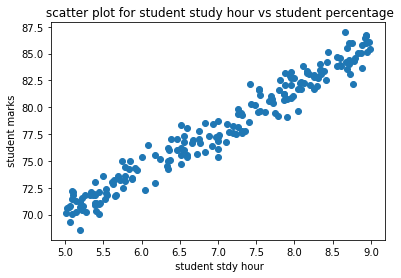

In [ ]:
# plot scatter plot to check data flow finding outlier etc
plt.scatter(x = 'study_hours', y = 'student_marks',data= df)
plt.xlabel(' student stdy hour')
plt.ylabel(' student marks')
plt.title(' scatter plot for student study hour vs student percentage')
plt.show()

# applyng simple linear regressin model

In [ ]:
from sklearn.model_selection import train_test_split    #import sklearn 

In [ ]:
train, test = train_test_split(df,test_size=0.2,random_state=51)

In [ ]:
df.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [ ]:
x=np.array(df.study_hours).reshape(-1,1)
y=np.array(df.student_marks).reshape(-1,1)

print( 'shape of x is :', x.shape)
print( 'shape of y is :', y.shape)

shape of x is : (200, 1)
shape of y is : (200, 1)


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=51)

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
print( 'shape of x is :', x_train.shape)
print( 'shape of y is :', y_train.shape)
print( 'shape of x is :', x_test.shape)
print( 'shape of y is :', y_test.shape)

shape of x is : (160, 1)
shape of y is : (160, 1)
shape of x is : (40, 1)
shape of y is : (40, 1)


In [ ]:
# y = mx + c
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr.coef_   # c value

array([[3.93571802]])

In [ ]:
lr.intercept_     # m value

array([50.44735504])

In [ ]:
lr.score(X=x_test,y=y_test)

0.9514124242154466

In [ ]:
y_pred=lr.predict(x_test)
y_pred

array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896],
       [80.75238377],
       [72.84159055],
       [71.66087515],
       [73.23516235],
       [71.66087515],
       [73.47130543],
       [76.38373677],
       [73.23516235],
       [73.58937697],
       [82.95638585],
       [70.40144538],
       [73.23516235],
       [78.74516758],
       [75.55723598],
       [82.68088559],
       [76.65923703],
       [70.48015974],
       [74.77009238],
       [77.98143645],
       [85.59331693],
       [82.56281405],
       [76.42309395],
       [85.0423164 ],
       [78.39095296],
       [81.38209865],
       [81.73631327],
       [83.15317176],
       [82.20859943],
       [81.10659839],
       [73.58937697],
       [71.1492318 ],
       [71.89701823],
       [81.53952737],
       [72.60544747],
       [71.93637541]])

In [ ]:
# sample pridict 
y_pred= lr.predict([[4]])[0][0].round()
y_pred

66.0

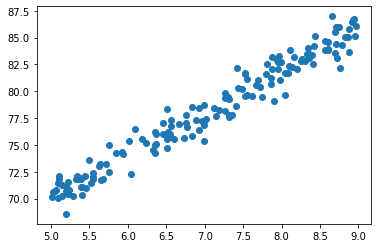

In [ ]:
plt.scatter(x_train,y_train)

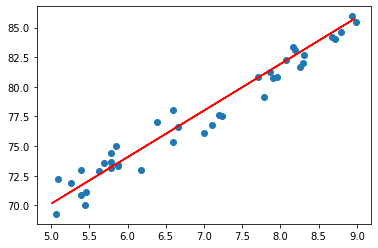

In [ ]:
plt.scatter(x_test,y_test)
plt.plot(x_train,lr.predict(x_train),color='r')
plt.show()

In [ ]:
import joblib

In [ ]:
joblib.dump(lr,'student_mark_predictor.pkl')

['student_mark_predictor.pkl']

In [34]:
model= joblib.load('student_mark_predictor.pkl')

In [35]:
model.predict([[5]])[0][0]

70.12594512018406